In [20]:
import blocksci
import matplotlib.pyplot as plt
import matplotlib.ticker
import collections
import pandas as pd
import numpy as np
%matplotlib notebook

In [43]:
chain = blocksci.Blockchain('/home/shresthanikesh23/bitcoin-data')

In [44]:
%time net_coins_per_block = chain.map_blocks(lambda block: block.net_address_type_value())

CPU times: user 12.3 s, sys: 3.59 s, total: 15.9 s
Wall time: 47 s


In [45]:
df = chain.heights_to_dates(df)

In [39]:
df = pd.DataFrame(net_coins_per_block).fillna(0).cumsum()/1e8

In [40]:
df = df.rename(columns={t:str(t) for t in df.columns})

<IPython.core.display.Javascript object>


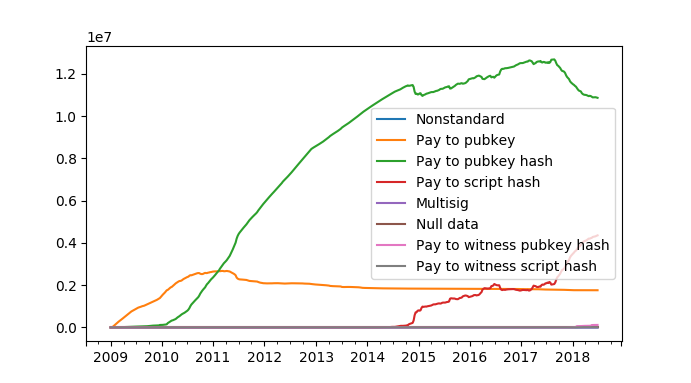

In [50]:
ax = df.resample("W").mean().plot()

In [49]:
ax.set_ylim(ymin=0)

(0, 13313558.289755534)

In [57]:
example_block_height = 465100

In [58]:
df = pd.DataFrame(chain[example_block_height].txes.fee_per_byte(), columns=["Satoshis per byte"])


In [59]:
df

,Satoshis per byte
0,0
1,1278
2,1176
3,1135
4,1135
5,1004
6,1000
7,888
8,888
9,884


<IPython.core.display.Javascript object>


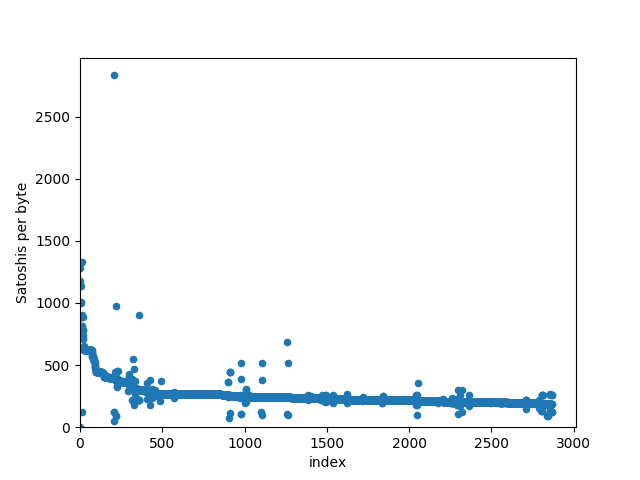

In [60]:
ax = df.reset_index().plot.scatter(x="index", y="Satoshis per byte")

In [61]:
ax.set_ylim(0)

(0, 2975.7066549642186)

In [62]:
ax.set_xlim(0)

(0, 3014.5549590217242)

In [64]:
plt.show()

In [65]:
%time txes = chain.blocks.txes.including_output_of_type(blocksci.address_type.nulldata).all

CPU times: user 23 s, sys: 4.46 s, total: 27.4 s
Wall time: 2min 38s
